## Capstone Project - Car accident severity  and effect on traffic (Week 2)
### Applied Data science

### Table of contents

- Introduction: Business Problem -
- Data Understanding
- Methodology
- Analysis
- Results and Discussion
- Conclusion



## Introduction: Business Problem

In this project we will try to find the fatalities or severity occured in an an accident.Specifecifically tho report will be helpul to government  
officials and highway authorities in predicting the fatalities of an accident according to the given ** weather conditions, road conditions and visibility conditions of street lights** and ** collision address type**.When the condition are bad, alert drivers to remind trevelling people to be more careful and divert the route if any accident on thier way of destination. 

We will use data science powers to generate a model which will predict car accident probability using the conditions metioned in the business understanding.





## Data Understanding

Based on the defination of our problem, factors that will influence our decisions. Our predictor variable or attribute which will be 'SEVERITYCODE' as metioned in our metadata of certain city.
- **3**- fatality
- **2b** - serious injury
- **2** - injury
- **1** - prop damage
- **0** - unknown

Attributes used to wiegh the severity of an accident are 'WEATHER', 'ROADCOND' and  'LIGHTCOND' in this project.
- **WEATHER**- Weather condition during collision
- **ROADCOND** - Condition of road during collision
- **LIGHTCOND** - Condition of street lights during collision 

Collision address type(ADDRTYPE)
    - Alley
    - Block
    - Intersection
According to collision address type wewill defineif any accident occured we will be able to take the other route if possible.




## Data preparation

The data preparation includes all the required activities to construct the final dataset which will be fed into the modeling tools. Data preparation can be performed multiple times and it includes balancing the labeled data, transformation, filling missing data, and cleaning the dataset.For this project we will be using the data set of **BANGLORE  city** of **India**.
The dataset which we are considering in unbalanced so we will drop the unwanted variables from our main dataset and create a new one considering the varibles or attributes which are metioned in the ** Data Understanding ** section.

#### Loading the dataset and extraction of data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
file = r"C:\Users\Mohit Singh\Desktop\deloitte\Data-Collisions.csv"

In [3]:
df =pd.read_csv(file)
print(df)


D:\ana\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.306426  47.545739         5   17700      17700   
...              ...         ...        ...       ...     ...        ...   
194668             2 -122.290826  47.565408    219543  309534     310814   
194669             1 -122.344526  47.690924    219544  309085     310365   
194670             2 -122.306689  47.683047    219545  311280     312640   
194671             2 -122.355317  47.678734    219546  309514     310794   
194672             1 -122.289360  47.611017    219547  308220     309500   

       REPORTNO   STATUS      ADDRTYPE   INTKEY  ... ROADCOND  \
0       3502005  Match

## EXPLORATORY DATA ANALYSIS

In [4]:
# Descriptive statistics
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
df1= df[['SEVERITYCODE', 'ADDRTYPE', 'ROADCOND', 'WEATHER', 'LIGHTCOND']].copy()
df1.head(5)

,SEVERITYCODE,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND
0,2,Intersection,Wet,Overcast,Daylight
1,1,Block,Wet,Raining,Dark - Street Lights On
2,1,Block,Dry,Overcast,Daylight
3,1,Block,Dry,Clear,Daylight
4,2,Intersection,Wet,Raining,Daylight


In [6]:
df1.dropna(subset =["LIGHTCOND"], axis=0, inplace=True)
df1.head(20)

,SEVERITYCODE,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND
0,2,Intersection,Wet,Overcast,Daylight
1,1,Block,Wet,Raining,Dark - Street Lights On
2,1,Block,Dry,Overcast,Daylight
3,1,Block,Dry,Clear,Daylight
4,2,Intersection,Wet,Raining,Daylight
5,1,Intersection,Dry,Clear,Daylight
6,1,Intersection,Wet,Raining,Daylight
7,2,Intersection,Dry,Clear,Daylight
8,1,Block,Dry,Clear,Daylight
9,2,Intersection,Dry,Clear,Daylight


In [7]:
df1.isnull().sum()

SEVERITYCODE       0
ADDRTYPE        1814
ROADCOND          60
WEATHER          122
LIGHTCOND          0
dtype: int64

In [8]:
df1.shape

(189503, 5)

In [9]:
df1.fillna("Unknown", inplace=True)

In [10]:
df1.head(20)

,SEVERITYCODE,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND
0,2,Intersection,Wet,Overcast,Daylight
1,1,Block,Wet,Raining,Dark - Street Lights On
2,1,Block,Dry,Overcast,Daylight
3,1,Block,Dry,Clear,Daylight
4,2,Intersection,Wet,Raining,Daylight
5,1,Intersection,Dry,Clear,Daylight
6,1,Intersection,Wet,Raining,Daylight
7,2,Intersection,Dry,Clear,Daylight
8,1,Block,Dry,Clear,Daylight
9,2,Intersection,Dry,Clear,Daylight


In [11]:
df1.isnull().sum()

SEVERITYCODE    0
ADDRTYPE        0
ROADCOND        0
WEATHER         0
LIGHTCOND       0
dtype: int64

In [12]:
df1 = df1[df1.ADDRTYPE != "Unknown"]
df1 = df1[df1.ROADCOND != "Unknown"]
df1 = df1[df1.WEATHER != "Unknown"]

In [13]:
df1.shape

(172081, 5)

In [14]:
df1['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'], dtype=object)

As we have unbalanced dataset have number of empty cells filled with **NaN** values,so we have eliminated it.Value filled with **Unknown** are also deleted from dataset.therefore we are remained with balanced dataset.   

## Methodology

#### Feature engineering

In [43]:
#Number of categorical values in a dataset
re= df1['SEVERITYCODE'].value_counts()
re


1    116137
2     55944
Name: SEVERITYCODE, dtype: int64

In [16]:
X=df1.values
X[0:5]

array([[2, 'Intersection', 'Wet', 'Overcast', 'Daylight'],
       [1, 'Block', 'Wet', 'Raining', 'Dark - Street Lights On'],
       [1, 'Block', 'Dry', 'Overcast', 'Daylight'],
       [1, 'Block', 'Dry', 'Clear', 'Daylight'],
       [2, 'Intersection', 'Wet', 'Raining', 'Daylight']], dtype=object)

In [17]:
#Label enoding to convert the categorical variable
from sklearn import preprocessing
add_r = preprocessing.LabelEncoder()
add_r.fit(['Intersection', 'Block','Alley'])
X[:,1] = add_r.transform(X[:,1])

add_a = preprocessing.LabelEncoder()
add_a.fit(['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Other', 'Sand/Mud/Dirt',
       'Standing Water', 'Oil'])
X[:,2] = add_a.transform(X[:,2])

add_b = preprocessing.LabelEncoder()
add_b.fit(['Overcast', 'Raining', 'Clear', 'Snowing', 'Other',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'])
X[:,3] = add_b.transform(X[:,3])

add_c = preprocessing.LabelEncoder()
add_c.fit(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'])
X[:,4] = add_c.transform(X[:,4])




X=X[:,1:]
X

array([[2, 7, 4, 5],
       [1, 7, 6, 2],
       [1, 0, 4, 5],
       ...,
       [2, 0, 1, 5],
       [2, 0, 1, 6],
       [1, 7, 1, 5]], dtype=object)

We have converted the categorical variables using **LabelEncoder** as sklearn libraries dont work on categorical variables

In [18]:
y= df1.iloc[:,0]
y

0         2
1         1
2         1
3         1
4         2
         ..
194668    2
194669    1
194670    2
194671    2
194672    1
Name: SEVERITYCODE, Length: 172081, dtype: int64

In [19]:
df1['ADDRTYPE'].unique()

array(['Intersection', 'Block', 'Alley'], dtype=object)

In [20]:
Intersection = [0,0] 
Block = [0,0] 
Alley = [0,0]
for i in range(len(df1['SEVERITYCODE'])):
    if(df1['ADDRTYPE'].get(i) == "Block"):
        if(df1['SEVERITYCODE'][i]==1):
            Block[0]=Block[0]+1
        else:
            Block[1]=Block[1]+1
    elif(df1['ADDRTYPE'].get(i) == 'Intersection'):
        if(df1['SEVERITYCODE'][i] is 1):
            Intersection[0]=Intersection[0]+1
        else:
            Intersection[1]=Intersection[1]+1
    elif(df1['ADDRTYPE'].get(i) == 'Alley'):
        if(df1['SEVERITYCODE'][i] == 1):
            Alley[0]=Alley[0]+1
        else:
            Alley[1]=Alley[1]+1


Text(0.5, 1.0, 'No. of Severity cases vs Collision address type')

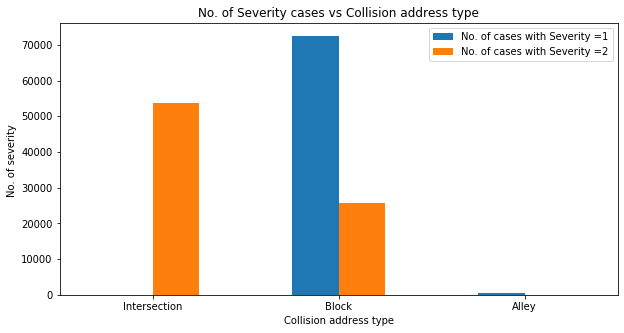

In [21]:

for1= [Intersection[0],Block[0],Alley[0]]
for2= [Intersection[1],Block[1],Alley[1]]
ind = df1['ADDRTYPE'].unique()
df = pd.DataFrame({'No. of cases with Severity =1': for1,
                   'No. of cases with Severity =2': for2}, index=ind)

ax = df.plot.bar(rot=0,figsize=(10,5))
ax.set_ylabel('No. of severity ')
ax.set_xlabel('Collision address type')
ax.set_title('No. of Severity cases vs Collision address type')

In [22]:

Wet=[0,0]
Dry=[0,0]
Snow=[0,0]
Ice=[0,0]
Other=[0,0]
Sand=[0,0]
Standing=[0,0]
Oil=[0,0]
for i in range(len(df1['SEVERITYCODE'])):
    if(df1['ROADCOND'].get(i) == "Wet"):
        if(df1['SEVERITYCODE'][i]==1):
            Wet[0]=Wet[0]+1
        else:
            Wet[1]=Wet[1]+1
    elif(df1['ROADCOND'].get(i) == 'Dry'):
        if(df1['SEVERITYCODE'][i] is 1):
            Dry[0]=Dry[0]+1
        else:
            Dry[1]=Dry[1]+1
    elif(df1['ROADCOND'].get(i) == 'Snow/Slush'):
        if(df1['SEVERITYCODE'][i] == 1):
            Snow[0]=Snow[0]+1
        else:
            Snow[1]=Snow[1]+1
    elif(df1['ROADCOND'].get(i) == 'Ice'):
        if(df1['SEVERITYCODE'][i] is 1):
            Ice[0]=Ice[0]+1
        else:
            Ice[1]=Ice[1]+1
    elif(df1['ROADCOND'].get(i) == 'Other'):
        if(df1['SEVERITYCODE'][i] == 1):
            Other[0]=Other[0]+1
        else:
            Other[1]=Other[1]+1
    elif(df1['ROADCOND'].get(i) == 'Sand/Mud/Dirt'):
        if(df1['SEVERITYCODE'][i] is 1):
            Sand[0]=Sand[0]+1
        else:
            Sand[1]=Sand[1]+1
    elif(df1['ROADCOND'].get(i) == 'Standing Water'):
        if(df1['SEVERITYCODE'][i] == 1):
            Standing[0]=Standing[0]+1
        else:
            Standing[1]=Standing[1]+1
    elif(df1['ROADCOND'].get(i) == 'Oil'):
        if(df1['SEVERITYCODE'][i] == 1):
            Oil[0]=Oil[0]+1
        else:
            Oil[1]=Oil[1]+1

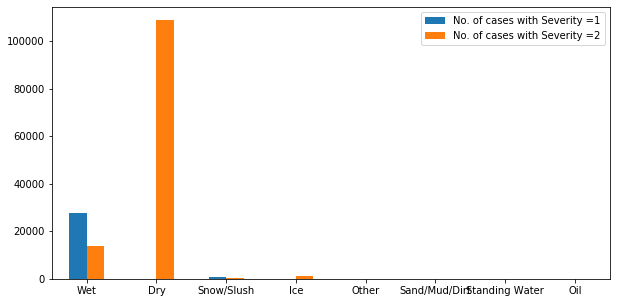

In [23]:

for2= [Wet[1],
Dry[1],
Snow[1],
Ice[1],
Other[1],
Sand[1],
Standing[1],
Oil[1]]

for1= [Wet[0],
Dry[0],
Snow[0],
Ice[0],
Other[0],
Sand[0],
Standing[0],
Oil[0]]
index = df1['ROADCOND'].unique()
df = pd.DataFrame({'No. of cases with Severity =1': for1,
                   'No. of cases with Severity =2': for2}, index=index)
ax = df.plot.bar(rot=0,figsize=(10,5))

In [24]:

Daylight = [0, 0]
DarkStreetLightsOn = [0, 0]
DarkNoStreetLights = [0, 0]
Unknown = [0, 0]
Dusk = [0, 0]
Dawn=[0, 0]
DarkStreetLightsOff = [0, 0]
Other = [0, 0]
DarkUnknownLighting = [0, 0 ]
for i in range(len(df1['SEVERITYCODE'])):
    if(df1['LIGHTCOND'].get(i) == 'Daylight'):
        if(df1['SEVERITYCODE'][i] == 1):
            Daylight[0] = Daylight[0]+1
        else:
            Daylight[1] = Daylight[1]+1
    elif(df1['LIGHTCOND'].get(i) == 'Dark - Street Lights On'):
        if(df1['SEVERITYCODE'][i] is 1):
            DarkStreetLightsOn[0] = DarkStreetLightsOn[0]+1
        else:
            DarkStreetLightsOn[1] = DarkStreetLightsOn[1]+1
    elif(df1['LIGHTCOND'].get(i) == 'Dark - No Street Lights'):
        if(df1['SEVERITYCODE'][i] == 1):
            DarkNoStreetLights[0] = DarkNoStreetLights[0]+1
        else:
            DarkNoStreetLights[1] = DarkNoStreetLights[1]+1
    elif(df1['LIGHTCOND'].get(i) == 'Dusk'):
        if(df1['SEVERITYCODE'][i] == 1):
            Dusk[0]=Dusk[0]+1
        else:
            Dusk[1]=Dusk[1]+1
    elif(df1['LIGHTCOND'].get(i) == 'Dark - Street Lights Off '):
        if(df1['SEVERITYCODE'][i] is 1):
            DarkStreetLightsOff [0]=DarkStreetLightsOff [0]+1
        else:
            DarkStreetLightsOff [1]=DarkStreetLightsOff [0]+1
    elif(df1['LIGHTCOND'].get(i) == 'Dark - Unknown Lighting'):
        if(df1['SEVERITYCODE'][i] == 1):
           DarkUnknownLighting[0]= DarkUnknownLighting[0]+1
        else:
            DarkUnknownLighting[1]=DarkUnknownLighting[0]+1
    elif(df1['LIGHTCOND'].get(i) == 'Dawn'):
        if(df1['SEVERITYCODE'][i] == 1):
            Dawn[0]=Dawn[0]+1
        else:
            Dawn[1]=Dawn[1]+1
    elif(df1['LIGHTCOND'].get(i) == 'Other'):
        if(df1['SEVERITYCODE'][i] == 1):
            Other[0]=Other[0]+1
        else:
            Other[1]=Other[1]+1


for2= [Daylight[1],
DarkStreetLightsOn[1],
DarkNoStreetLights [1],
Unknown[1],
Dusk[1],
DarkStreetLightsOff[1],
Other[1],
Dawn[1],DarkUnknownLighting[1]]

for1=[Daylight[0],
DarkStreetLightsOn[0],
DarkNoStreetLights[0],
Unknown[0],
Dusk[0],
DarkStreetLightsOff [0],
Other[0],
Dawn[0],
DarkUnknownLighting[0]]

Text(0.5, 1.0, 'No. of Severity cases vs LIGHTENING')

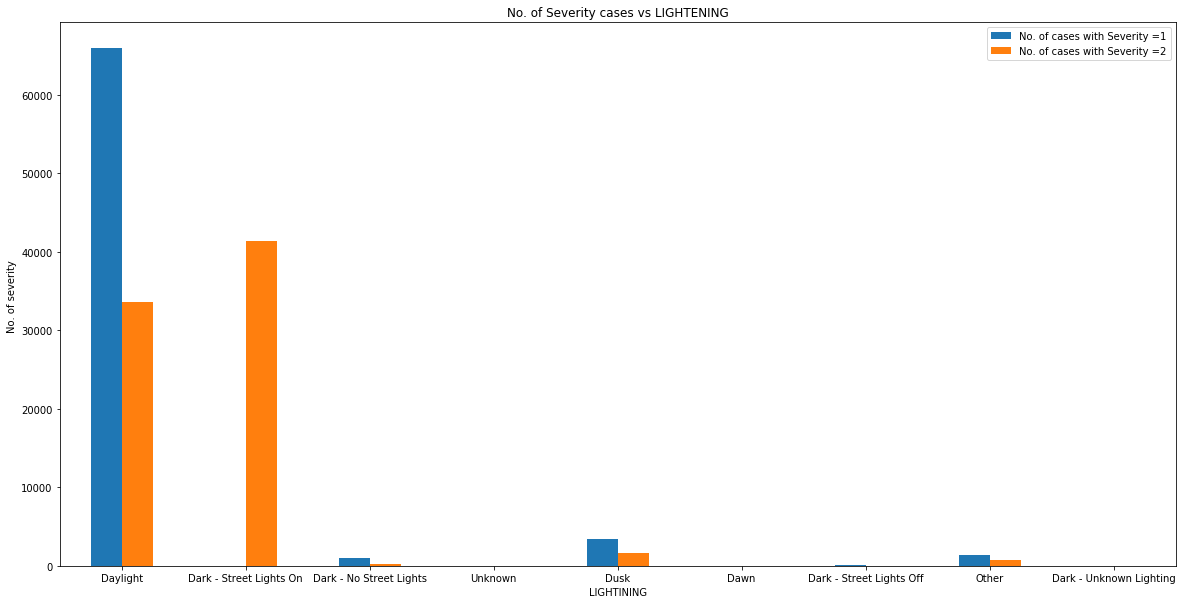

In [42]:
ind = df1['LIGHTCOND'].unique()
df = pd.DataFrame({'No. of cases with Severity =1': for1,
                   'No. of cases with Severity =2': for2}, index=ind)

ax = df.plot.bar(rot=0,figsize=(20,10))
ax.set_ylabel('No. of severity ')
ax.set_xlabel('LIGHTINING')
ax.set_title('No. of Severity cases vs LIGHTENING')

## Model Developement
In the model developement we are going to use Decision Tree machine learning  which is supervised as our data is labeled.
We will our dataset in training and testing subset.Here we are using 30% of data in test case.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 3)

In [28]:
X_train.shape

(120456, 4)

In [29]:
y_train.shape

(120456,)

we check the dimensions of our taining data and it maches

In [30]:
X_test.shape

(51625, 4)

In [31]:
y_test.shape

(51625,)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
severity = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [34]:
severity.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Model Prediction

In [35]:
pred = severity.predict(X_test)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
y_test

80979     1
95372     1
107749    1
72584     1
164741    1
         ..
193672    1
83855     1
108118    1
125664    1
132601    2
Name: SEVERITYCODE, Length: 51625, dtype: int64

## Model Evalution

here we are evaluating our model that we are predicting.

In [37]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred))
                            

DecisionTrees's Accuracy:  0.6763002421307506


## Vizualization



In [38]:
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

In [39]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

D:\ana\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


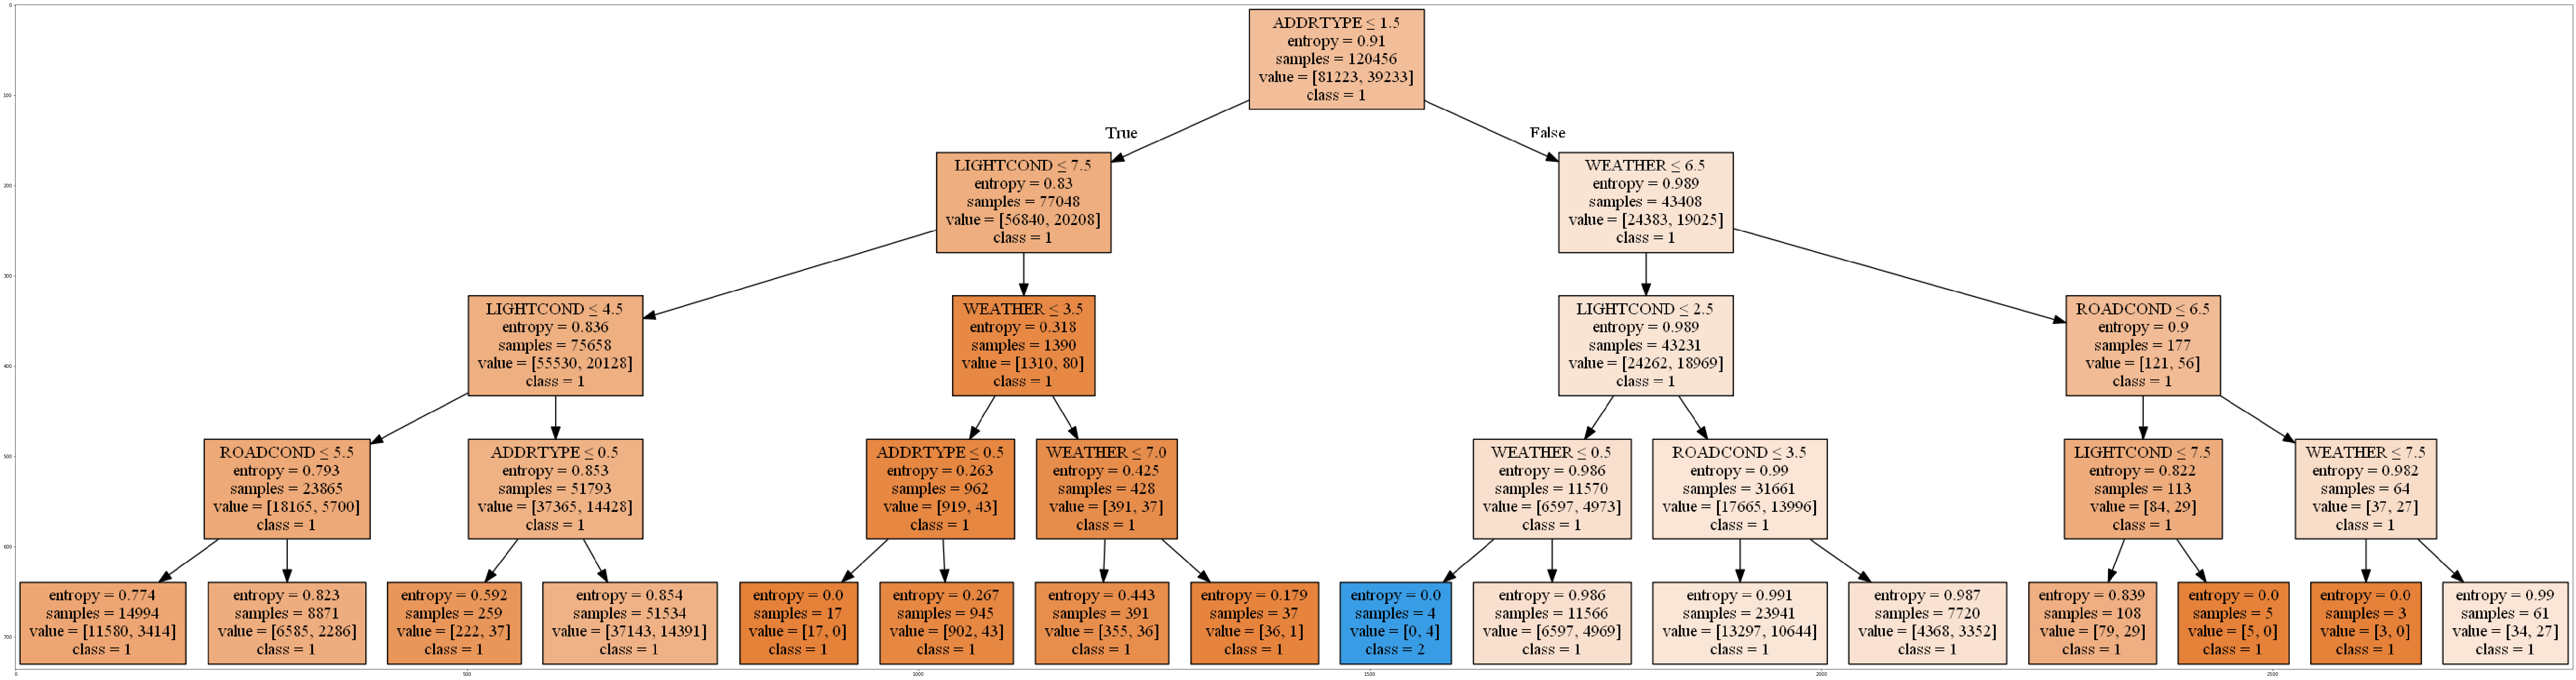

In [40]:
dot_data = StringIO()
filename = "Severitytree.png"
featureNames = df1.columns[1:5]
output = [str(x) for x in np.unique(y_train)] 
targetNames = df1["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(severity,feature_names=featureNames, out_file=dot_data, class_names= output, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

The above diagram is Decision Tree of car severity dataset with ADDRTYPE as its main attribute.The Atrribute is selected as the it give less entropy and  more information gain.

## Discussion & Conclusion

In the beginning of this notebook, we had categorical data that was of type 'object'. This is not a data type that we could have fed through an algoritim, so label encoding was used to created new classes that were of type int8; a numerical data type.

After solving that issue we were presented with another - imbalanced data. As mentioned earlier, class 1 was nearly three times larger than class 2. The solution to this was downsampling the majority class with sklearn's resample tool. We have change the categorical value.

Once we analyzed and cleaned the data, it was then fed through ML model;Decision Tree  because of its binary nature.

Evaluation metrics used to test the accuracy of our model. Choosing values evalution metrices to improve our accuracy to be the best possible.

Based on historical data from road block conditions pointing to certain classes, we can conclude that particular weather conditions have a somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2).